In [49]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
gdp_path = "../../dataset/gdp_2021.csv"
population_den_path = "../../dataset/population_density.csv"
population_path = "../../dataset/population7th.csv"
age_path = "../../dataset/aging_rate_2021.csv"

gdp = pd.read_csv(gdp_path)
population = pd.read_csv(population_path)
population_den = pd.read_csv(population_den_path)
aging = pd.read_csv(age_path)

aging

,Province,rate
0,重庆,18.0
1,辽宁,17.6
2,江苏,17.0
3,四川,17.0
4,黑龙江,16.8
5,上海,16.2
6,山东,16.0
7,吉林,15.8
8,湖南,15.6
9,安徽,15.6


In [55]:
gdp_density = pd.merge(gdp,population_den,on="Province")
gdp_age = pd.merge(gdp,aging,on="Province")
gdp_age

,Province,GDP,rate
0,广东,124369.67,8.5
1,江苏,116364.20,17.0
2,山东,83095.90,16.0
3,浙江,73516.00,14.0
4,河南,58887.41,13.7
5,四川,53850.79,17.0
6,湖北,50012.94,14.8
7,台湾,49985.81,15.8
8,福建,48810.36,11.0
9,湖南,46063.09,15.6


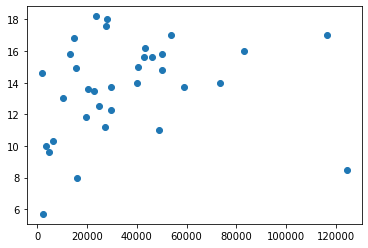

In [56]:
scatter_data = gdp_age
plt.scatter(scatter_data["GDP"], scatter_data["rate"])
plt.show()

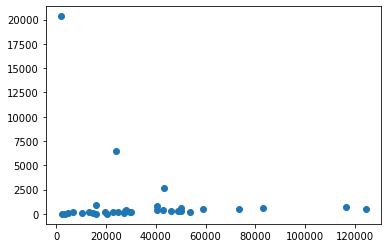

In [57]:
scatter_data = gdp_density
plt.scatter(scatter_data["GDP"], scatter_data["population_km"])
plt.show()

In [86]:
from sklearn.cluster import KMeans
# X = pd.merge(gdp_age,population_den, on="Province")
X = gdp_density
p_map = X.loc[:,"Province"]
X = X.drop("Province",axis=1)
X

,GDP,population_km
0,124369.67,481.00
1,116364.20,724.00
2,83095.90,579.00
3,73516.00,460.00
4,58887.41,553.00
5,53850.79,172.00
6,50012.94,325.00
7,49985.81,600.00
8,48810.36,285.00
9,46063.09,304.00


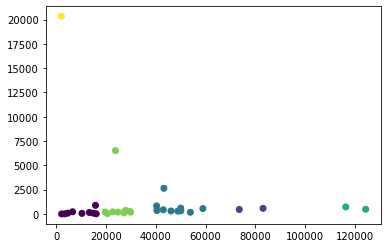

In [88]:
y_pred = KMeans(n_clusters=6, random_state=9).fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)
plt.show()

In [85]:
clusters = pd.merge(p_map, pd.DataFrame(y_pred).rename({0:"cluster"},axis=1),left_index=True,right_index=True)
clusters

,Province,cluster
0,广东,3
1,江苏,3
2,山东,1
3,浙江,1
4,河南,2
5,四川,2
6,湖北,2
7,台湾,2
8,福建,2
9,湖南,2
